# Breast Cancer Prediction using classification models

In [1]:
#importing Libraries

import numpy as np                # For mathematical calculations
import pandas as pd

import sklearn as sp              # For plotting graphs
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For data visualization

#feature selection----------------------------------
from sklearn import preprocessing                
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Scaling and Normalization----------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#PCA--------------------------------------------------
from sklearn import decomposition       
from sklearn.decomposition import PCA 

# Train and Test Sets-----------------------------------
from sklearn.model_selection import train_test_split

#models----------------------------------------------
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from math import sqrt

# Scores/performance evaluation----------------------
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix 
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
# 1. Data Collection
df = pd.read_csv('train_main.csv')

    #remove unnamed dummy collumn
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
# Dropping data with duplicate information
df = df.drop(['id','radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'], axis = 1)

In [4]:
#df.rename(columns=lambda x: x.split(':')[0], inplace=True)
df.columns = ['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension']

## 1. DATASET DESCRIPTION -------------------------------------------------------

In [5]:
df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## 2. Exploratory Data Analysis-------------------------------------------------------

In [6]:
    #Viewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave_points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [7]:
df.isnull().sum()

diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

As seen all Data entries are consistent.

In [8]:
    #Viewing data
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### 2.1 Target Value Analysis --------------------------------------------------------------

In [9]:
# Univariate Analysis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Normalizing Diagnosis: scaling values from 0 to 1 instead of number
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

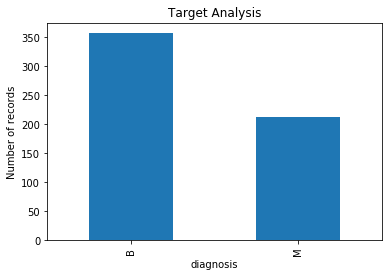

In [11]:
plt.xlabel('diagnosis')
plt.ylabel('Number of records')
plt.title('Target Analysis')
df['diagnosis'].value_counts().plot.bar()
plt.show()

### 2.3 Analysis for independent variables ----------------

In [12]:
def scale(x):
    scaler = preprocessing.MinMaxScaler()
    df=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    return df

In [13]:
visual=pd.DataFrame(df)
label=pd.DataFrame(df['diagnosis'])
visual=visual.drop(['diagnosis'], axis=1)

In [14]:
visual=scale(visual)

In [15]:
sns.set(style="whitegrid")

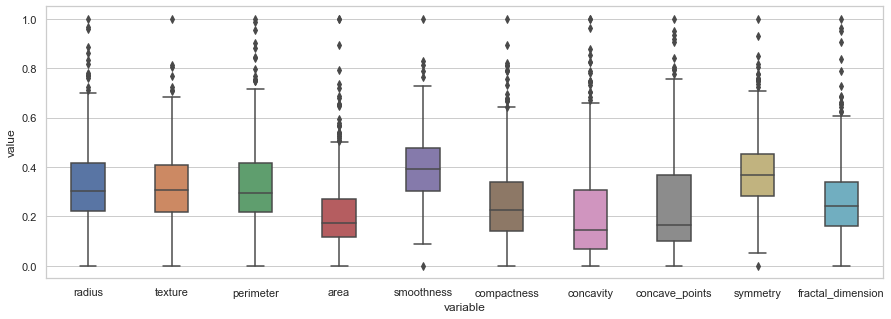

In [16]:
f, axes = plt.subplots(figsize=(15,5))
sns.boxplot(x="variable", y="value",width=0.4,data=pd.melt(visual))

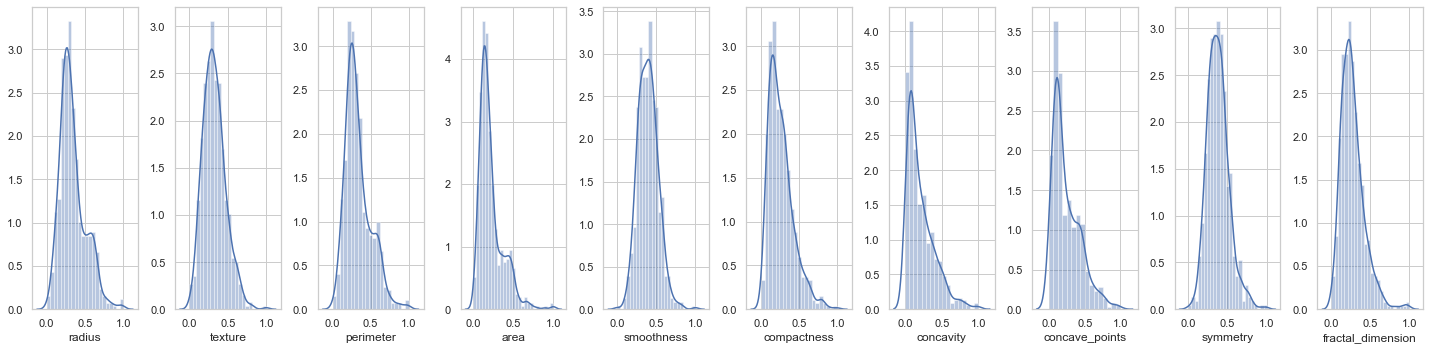

In [17]:
f, axes = plt.subplots(1, 10,figsize=(20,5))
i=0
for col in visual:
    sns.distplot(visual[col],ax=axes[i],label=col)
    i=i+1
    f.tight_layout(pad=1)
plt.show()

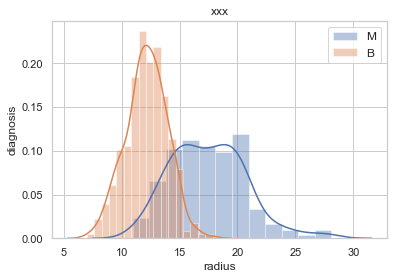

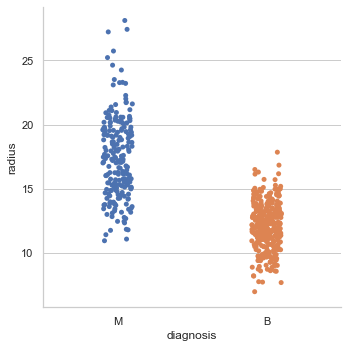

In [18]:
# f, axes = plt.subplots(2, 2,figsize=(10,5))

hist = df[df.diagnosis == 'M']
sns.distplot(hist['radius'], label='M')
hist = df[df.diagnosis == 'B']
sns.distplot(hist['radius'], label='B')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('xxx')
plt.xlabel('radius')
plt.ylabel('diagnosis')

sns.catplot(x='diagnosis',y='radius',data=df,)

### 2.4 Feature Selection

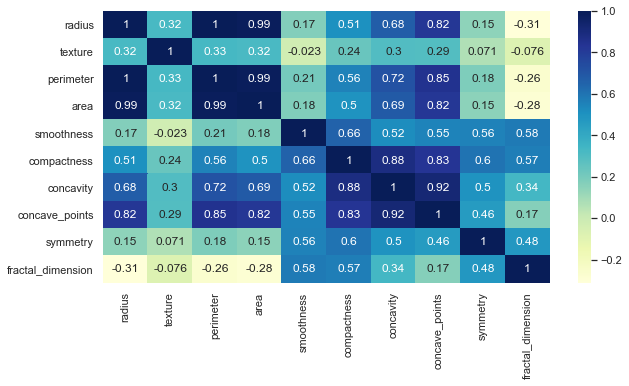

In [19]:
f, axes = plt.subplots(figsize=(10,5))
v=visual.corr()
sns.heatmap(v, annot=True, cmap="YlGnBu")

In [20]:
#features ranking using selectkbest
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(visual,label)

dfscores = pd.DataFrame(fit.scores_) #generate feature score
dfcolumns = pd.DataFrame(visual.columns)  #extract feature name

#combine rank and feature name
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #Headings

print(featureScores.nlargest(8,'Score'))  #print score

            Specs      Score
7  concave_points  52.405743
6       concavity  46.186395
3            area  29.328594
2       perimeter  26.528902
0          radius  24.897293
5     compactness  20.353176
1         texture   6.394071
8        symmetry   3.133130


### 2.5 Principal Component Analysis

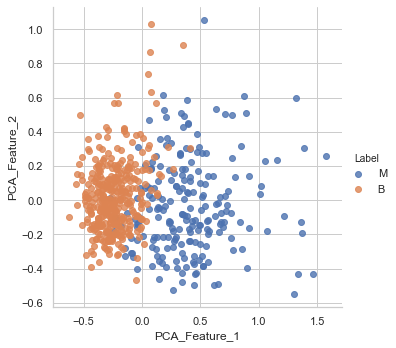

In [21]:
pca1 = decomposition.PCA(n_components = 2)
pca1.fit(visual)
x_transformed = pca1.transform(visual)
x_transformed_df = pd.DataFrame(x_transformed)

PCA_dataset = pd.concat([x_transformed_df,label], axis = 1)
PCA_dataset.columns=['PCA_Feature_1', 'PCA_Feature_2', 'Label']

sns.lmplot(x ='PCA_Feature_1', y='PCA_Feature_2', hue ='Label', data = PCA_dataset, fit_reg=False )
plt.show()

## 3. Data Preprocessing ------------------------------------

In [22]:
# Already dropped duplicate columns for features

In [23]:
# replace B=0, M=1
df.replace('M', 1, inplace=True)
df.replace('B', 0, inplace=True)

In [24]:
feature=df.drop('diagnosis',axis=1)
label=df['diagnosis']

In [25]:
#splitting dataset
x_train,x_test,y_train,y_test=train_test_split(visual,label,test_size=0.2, random_state=42)

## 5. Evaluation using ROC Curve, Confusion Matrix and model output

In [26]:
def genratescore(y_pred,model):
    acc=accuracy_score(y_test, y_pred)
    cm=confusion_matrix(y_test, y_pred)
    cr=classification_report(y_test, y_pred)
    rms=sqrt(mean_squared_error(y_test,y_pred))
    f = f1_score(y_test, y_pred,average='micro')
    score = model.score(x_test, y_test)
    cv5 = cross_val_score(model, x_train, y_train, cv=5, scoring= 'neg_mean_squared_error')
    cv10 = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv15 = cross_val_score(model, x_train, y_train.values.ravel(), cv=15, scoring='accuracy')
    cv20 = cross_val_score(model, x_train, y_train.values.ravel(), cv=20, scoring='accuracy')
    rmscv5 = sqrt(-(cv5.mean()))
    return acc,cm,cr,rms,f,cv5,cv10,cv15,cv20,rmscv5,score

In [27]:
def printscore(rms,acc,rmscv5):
    print("Root mean squared error ", rms)
    print('accuracy:',acc)
    print ("Root mean squared error for CrossValidation is ", rmscv5)  

In [28]:
def evaluate_model(y_pred, y_probs, cm):
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot ROC curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    
    # Plot CM
    f, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu")
    
    # Plot prediction
    fig, ax = plt.subplots()
    ax.plot(x_test['concave_points'], y_test, 'x', color='red',label='True')
    ax.plot(x_test['concave_points'], (y_pred+0.2)*0.9, '>', color='blue',label='Predicted')
    leg = ax.legend()

In [29]:
def evaluate_svm(y_pred, cm):
    # Plot CM
    f, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(cm, annot=True, cmap="YlGnBu")
    
    # Plot prediction
    fig, ax = plt.subplots()
    ax.plot(x_test['concave_points'], y_test, 'x', color='red',label='True')
    ax.plot(x_test['concave_points'], (y_pred+0.2)*0.9, '>', color='blue',label='Predicted')
    leg = ax.legend()

## 4. Modelling

In [30]:
def predict(model):
    # Fit on training data
    model.fit(x_train, y_train)
    
    # training predictions
#     tr_pred = model.predict(x_train)
#     tr_probs = model.predict_proba(x_train)[:, 1]
    
    # Actual predictions
    y_pred = model.predict(x_test)
    y_probs = model.predict_proba(x_test)[:, 1]
    
    return y_pred,y_probs

### 4.1. Random Forest-------------------------------------------------------------

In [31]:
n_nodes = []
max_depths = []

def rfmodel(n):
    rf_model = RandomForestClassifier(max_features='auto',n_jobs=None,
                                   random_state=None, n_estimators=n)
    #prediction
    rf_pred,rf_probs=predict(rf_model)
    
    #scores
    rf_acc,rf_cm,rf_cr,rf_rms,rf_f,rf_cv5,rf_cv10,rf_cv15,rf_cv20,rf_rmscv5,rf_score = genratescore(rf_pred,rf_model)
    
    #----------------------------------------------------    
    for ind_tree in rf_model.estimators_:
        n_nodes.append(ind_tree.tree_.node_count)
        max_depths.append(ind_tree.tree_.max_depth)
    node=int(np.mean(n_nodes))
    depth=int(np.mean(max_depths))
    print('Trees:',n ,'Average nodes:',node,'Depth',depth)
    
    #----------------------------------------------------
    return rf_pred,rf_probs,rf_acc,rf_cm,rf_cr,rf_rms,rf_f,rf_cv5,rf_cv10,rf_cv15,rf_cv20,rf_rmscv5,rf_score

#### Parameter Tuning

In [49]:
acc_rf = []
f_rf_score =[]
cv5_rf = []
cv10_rf = []
cv15_rf = []
cv20_rf = []
score_rf = []
rms_rf = []

for i in range(5, 105, 5):
    rf_pred,rf_probs,rf_acc,rf_cm,rf_cr,rf_rms,rf_f,rf_cv5,rf_cv10,rf_cv15,rf_cv20,rf_rmscv5,rf_score=rfmodel(i)
    
    acc_rf.append(rf_acc)
    rms_rf.append(rf_rms)
    f_rf_score.append(rf_f)
    score_rf.append(rf_score)  
    
    cv5_rf.append(rf_cv5.mean())
    cv10_rf.append(rf_cv10.mean())
    cv15_rf.append(rf_cv15.mean())
    cv20_rf.append(rf_cv20.mean())

Trees: 5 Average nodes: 49 Depth 7
Trees: 10 Average nodes: 50 Depth 7
Trees: 15 Average nodes: 50 Depth 7
Trees: 20 Average nodes: 49 Depth 7
Trees: 25 Average nodes: 50 Depth 8
Trees: 30 Average nodes: 50 Depth 8
Trees: 35 Average nodes: 50 Depth 8
Trees: 40 Average nodes: 50 Depth 8
Trees: 45 Average nodes: 50 Depth 8
Trees: 50 Average nodes: 50 Depth 8
Trees: 55 Average nodes: 50 Depth 8
Trees: 60 Average nodes: 50 Depth 8
Trees: 65 Average nodes: 50 Depth 8
Trees: 70 Average nodes: 50 Depth 8
Trees: 75 Average nodes: 50 Depth 8
Trees: 80 Average nodes: 50 Depth 8
Trees: 85 Average nodes: 50 Depth 8
Trees: 90 Average nodes: 50 Depth 8
Trees: 95 Average nodes: 50 Depth 8
Trees: 100 Average nodes: 50 Depth 8


#### Parameter

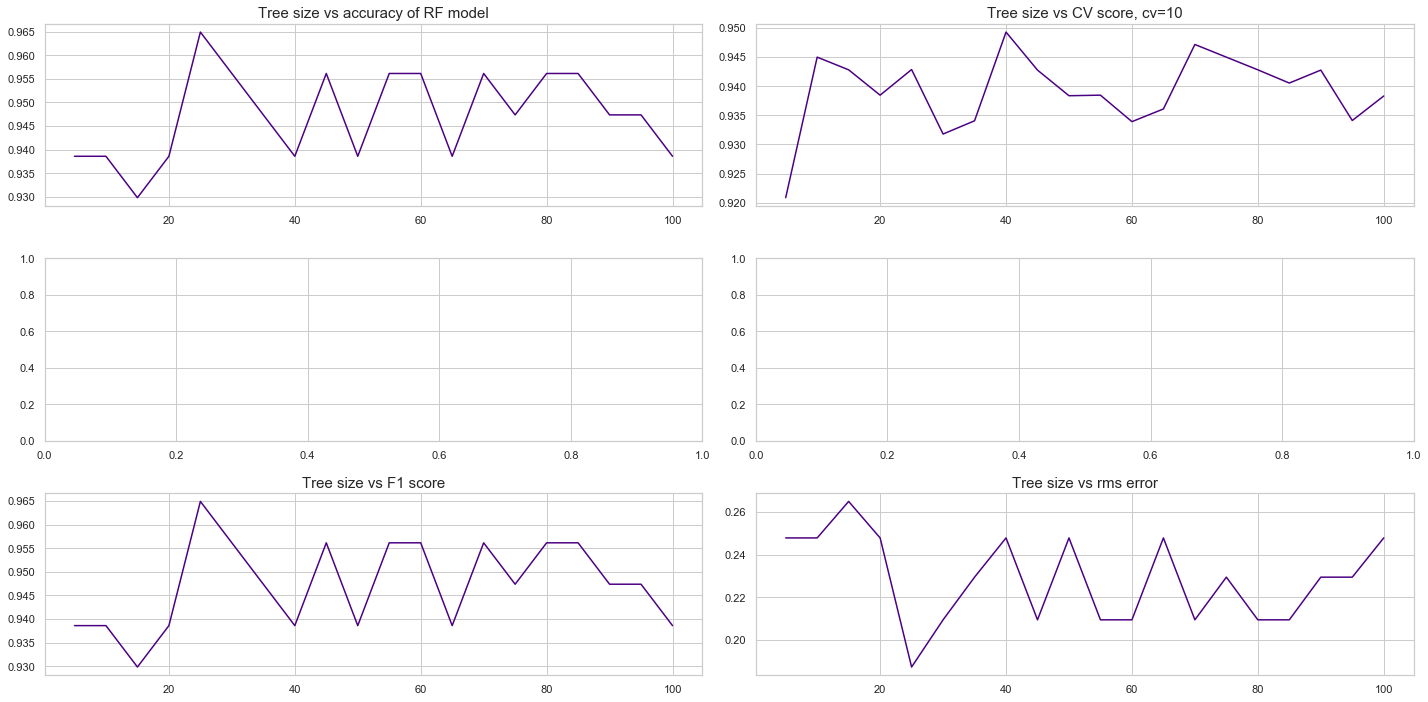

In [50]:
rf_range = range(5, 105, 5)

f, ax = plt.subplots(3, 2,figsize=(20,10))

ax[0,0].plot(rf_range, acc_rf,color='#4b0082',label=col)
ax[0,0].set_title('Tree size vs accuracy of RF model', fontsize=15)


ax[0,1].plot(rf_range, cv10_rf,color='#4b0082')
ax[0,1].set_title('Tree size vs CV score, cv=10', fontsize=15)

# ax[1,0].plot(rf_range, cv15_rf,color='#4b0082')
# ax[1,0].set_title('Tree size vs CV score, cv=15', fontsize=15)

# ax[1,1].plot(rf_range, cv20_rf,color='#4b0082')
# ax[1,1].set_title('Tree size vs CV score, cv=20', fontsize=15)

ax[2,0].plot(rf_range, f_rf_score,color='#4b0082')
ax[2,0].set_title('Tree size vs F1 score', fontsize=15)

ax[2,1].plot(rf_range, rms_rf,color='#4b0082')
ax[2,1].set_title('Tree size vs rms error', fontsize=15)


f.tight_layout(pad=1)

plt.show()

In [34]:
print('Minimum Accuracy:', min(acc_rf))
minacc = ((acc_rf.index(min(acc_rf))) * 5) + 5
print(minacc)

print('Maximum Accuracy:', max(acc_rf))
maxacc = ((acc_rf.index(max(acc_rf))) * 5) + 5
print(maxacc)
acc_rf

Minimum Accuracy: 0.9210526315789473
5
Maximum Accuracy: 0.9649122807017544
70


[0.9210526315789473,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315]

##### Case 1: Minimum Accuracy

Minimum Accuracy: 0.9210526315789473
Trees: 5 Average nodes: 50 Depth 8


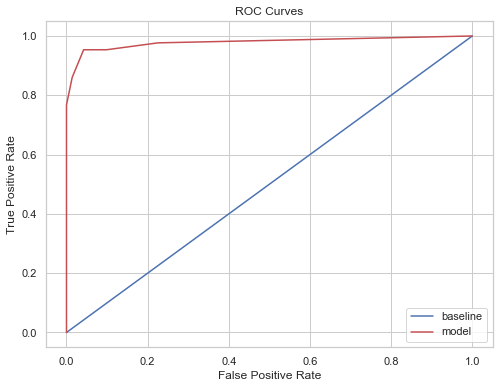

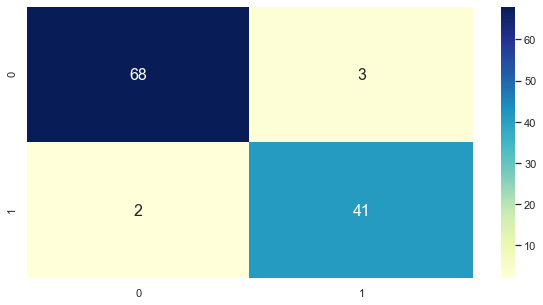

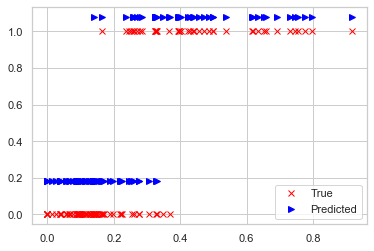

In [35]:
print('Minimum Accuracy:', min(acc_rf))
minacc = ((acc_rf.index(min(acc_rf))) * 5) + 5
rf_pred,rf_probs,rf_acc,rf_cm,rf_cr,rf_rms,rf_f,rf_cv5,rf_cv10,rf_cv15,rf_cv20,rf_rmscv5,rf_score=rfmodel(minacc)
evaluate_model(rf_pred, rf_probs, rf_cm)

##### Maximum Accuracy

Maximum Accuracy: 0.9649122807017544
Trees: 70 Average nodes: 50 Depth 8


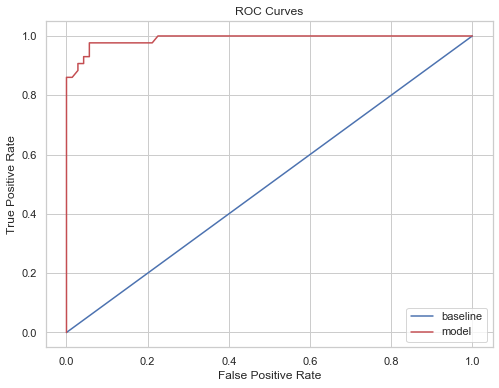

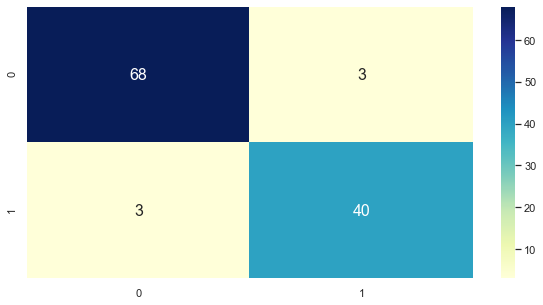

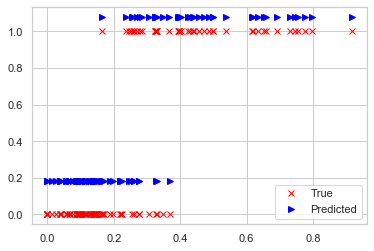

In [36]:
print('Maximum Accuracy:', max(acc_rf))
maxacc = ((acc_rf.index(max(acc_rf))) * 5) + 5
rf_pred,rf_probs,rf_acc,rf_cm,rf_cr,rf_rms,rf_f,rf_cv5,rf_cv10,rf_cv15,rf_cv20,rf_rmscv5,rf_score=rfmodel(maxacc)
evaluate_model(rf_pred, rf_probs, rf_cm)

### 4.2 SVM

#### 4.2.1 Linear Kernel

In [37]:
# Applying Linear Kernel
lsvm_model = SVC(kernel='linear')

lsvm_model.fit(x_train, y_train)
# Actual predictions
lsvm_pred = lsvm_model.predict(x_test)
    
#scores
lsvm_acc,lsvm_cm,lsvm_cr,lsvm_rms,lsvm_f,lsvm_cv5,lsvm_cv10,lsvm_cv15,lsvm_cv20,lsvm_rmscv5,lsvm_score = genratescore(lsvm_pred,lsvm_model)

#### Evaluation

Root mean squared error  0.1873171623163388
accuracy: 0.9649122807017544
Root mean squared error for CrossValidation is  0.26519741765271837
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



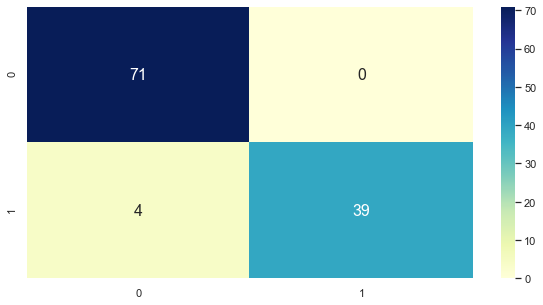

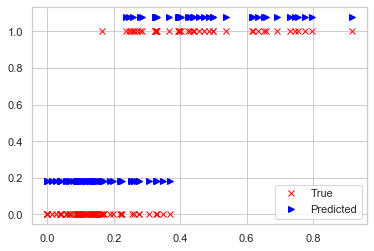

In [38]:
printscore(lsvm_rms,lsvm_acc,lsvm_rmscv5)
print(lsvm_cr)
evaluate_svm(lsvm_pred,lsvm_cm)

#### 4.2.2 Polynomial Kernel

In [39]:
# Applying Linear Kernel
psvm_model = SVC(kernel='poly', degree=8)

psvm_model.fit(x_train, y_train)
# Actual predictions
psvm_pred = psvm_model.predict(x_test)

#scores
psvm_acc,psvm_cm,psvm_cr,psvm_rms,psvm_f,psvm_cv5,psvm_cv10,psvm_cv15,psvm_cv20,psvm_rmscv5,psvm_score = genratescore(psvm_pred,psvm_model)

#### Evaluation

Root mean squared error  0.2961744388795462
accuracy: 0.9122807017543859
Root mean squared error for CrossValidation is  0.28516430582855445
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



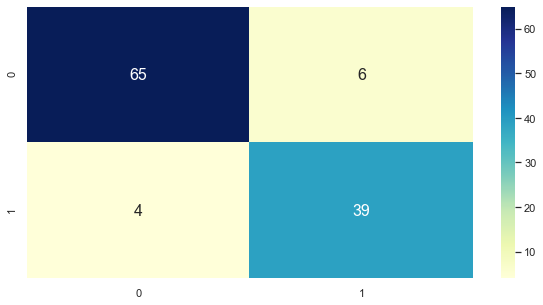

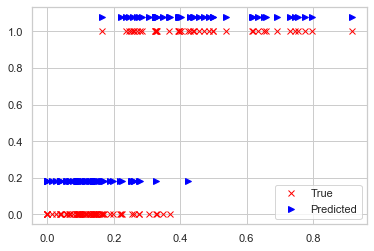

In [40]:
printscore(psvm_rms,psvm_acc,psvm_rmscv5)
print(psvm_cr)
evaluate_svm(psvm_pred, psvm_cm)

#### 4.2.3 Gaussiam Kernel

In [41]:
# Applying Linear Kernel
gsvm_model = SVC(kernel='rbf', degree=8)
gsvm_model.fit(x_train, y_train)
gsvm_pred = gsvm_model.predict(x_test)

#scores
gsvm_acc,gsvm_cm,gsvm_cr,gsvm_rms,gsvm_f,gsvm_cv5,gsvm_cv10,gsvm_cv15,gsvm_cv20,gsvm_rmscv5,gsvm_score = genratescore(gsvm_pred,gsvm_model)

#### Evaluation

Root mean squared error  0.16222142113076254
accuracy: 0.9736842105263158
Root mean squared error for CrossValidation is  0.24359938288234503
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



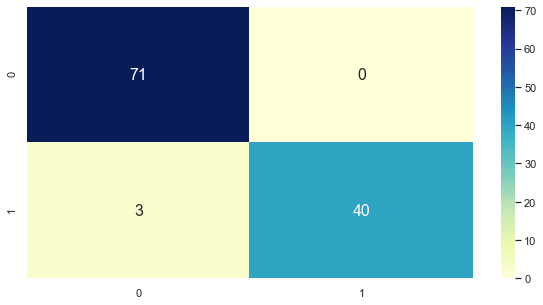

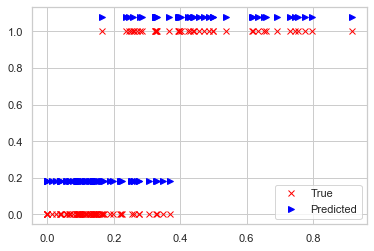

In [42]:
printscore(gsvm_rms,gsvm_acc,gsvm_rmscv5)
print(gsvm_cr)
evaluate_svm(gsvm_pred, gsvm_cm)

### 4.3. KNN-------------------------------------------------------------

In [43]:
n_nodes = []
max_depths = []

def knnmodel(n):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    #prediction
    knn_pred,knn_probs=predict(knn_model)
    
    #scores
    knn_acc, knn_cm, knn_cr, knn_rms, knn_f, knn_cv5, knn_cv10, knn_cv15, knn_cv20, knn_rmscv5, knn_score = genratescore(knn_pred,knn_model)
    
    return knn_pred, knn_probs, knn_acc, knn_cm, knn_cr, knn_rms, knn_f, knn_cv5, knn_cv10, knn_cv15, knn_cv20, knn_rmscv5,  knn_score

#### Parameter Tuning

In [44]:
acc_knn = []
f_knn_score =[]
cv5_knn = []
cv10_knn = []
cv15_knn = []
cv20_knn = []
score_knn = []
rms_knn = []

for i in range(1, 50, 2):
    knn_pred, knn_probs, knn_acc, knn_cm, knn_cr, knn_rms, knn_f, knn_cv5, knn_cv10, knn_cv15, knn_cv20, knn_rmscv5, knn_score=knnmodel(i)
    
    acc_knn.append(knn_acc)
    rms_knn.append(knn_rms)
    f_knn_score.append(knn_f)
    score_knn.append(knn_score)  
    
    cv5_knn.append(knn_cv5.mean())
    cv10_knn.append(knn_cv10.mean())
    cv15_knn.append(knn_cv15.mean())
    cv20_knn.append(knn_cv20.mean())

#### Parameter

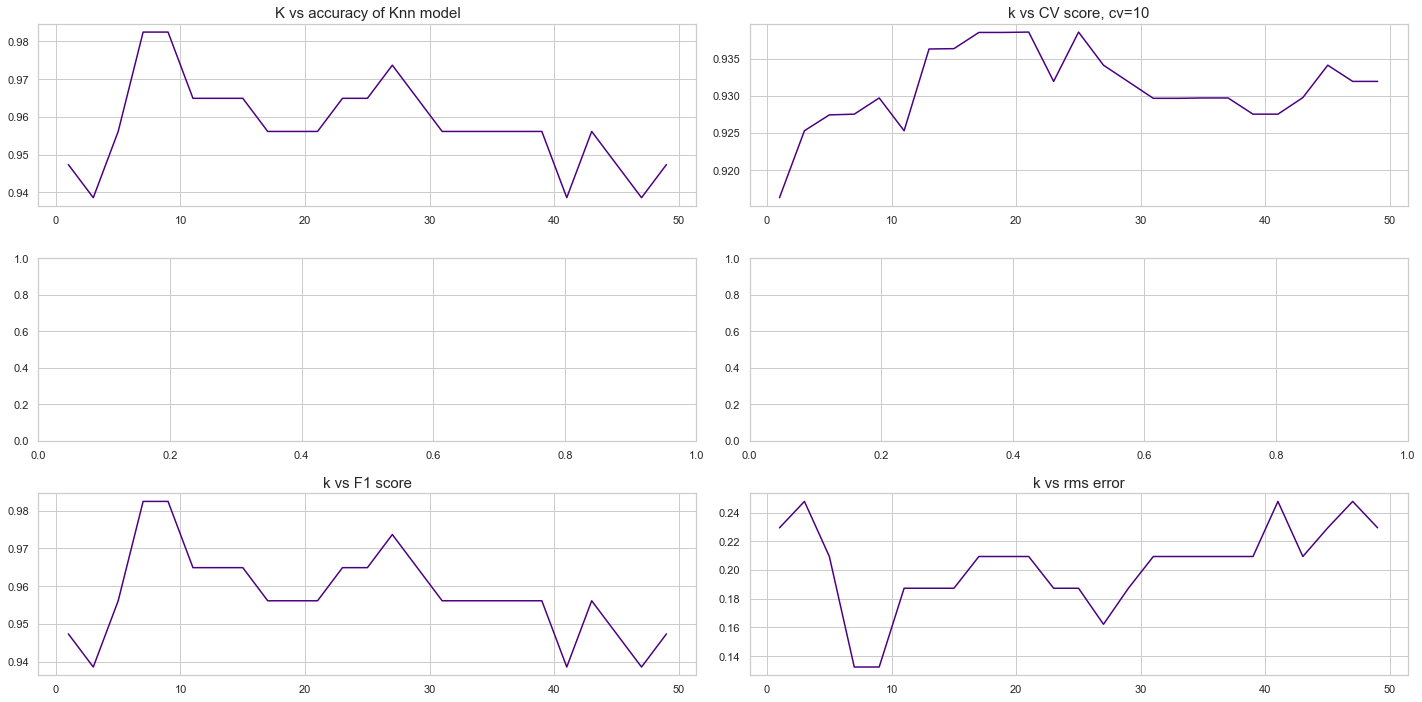

In [45]:
knn_range = range(1, 50, 2)

f, ax = plt.subplots(3, 2,figsize=(20,10))

ax[0,0].plot(knn_range, acc_knn,color='#4b0082',label=col)
ax[0,0].set_title('K vs accuracy of Knn model', fontsize=15)


ax[0,1].plot(knn_range, cv10_knn,color='#4b0082')
ax[0,1].set_title('k vs CV score, cv=10', fontsize=15)

# ax[1,0].plot(knn_range, cv15_knn,color='#4b0082')
# ax[1,0].set_title('k vs CV score, cv=15', fontsize=15)

# ax[1,1].plot(knn_range, cv20_knn,color='#4b0082')
# ax[1,1].set_title('k vs CV score, cv=20', fontsize=15)

ax[2,0].plot(knn_range, f_knn_score,color='#4b0082')
ax[2,0].set_title('k vs F1 score', fontsize=15)

ax[2,1].plot(knn_range, rms_knn,color='#4b0082')
ax[2,1].set_title('k vs rms error', fontsize=15)

f.tight_layout(pad=1)

plt.show()

In [46]:
print('Minimum Accuracy:', min(acc_knn))
minacc = ((acc_knn.index(min(acc_knn))) * 5) + 5
print(minacc)

print('Maximum Accuracy:', max(acc_knn))
maxacc = ((acc_knn.index(max(acc_knn))) * 5) + 5
print(maxacc)
acc_rf

Minimum Accuracy: 0.9385964912280702
10
Maximum Accuracy: 0.9824561403508771
20


[0.9210526315789473,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315]

##### Case 1: Minimum Accuracy

Minimum Accuracy: 0.9385964912280702


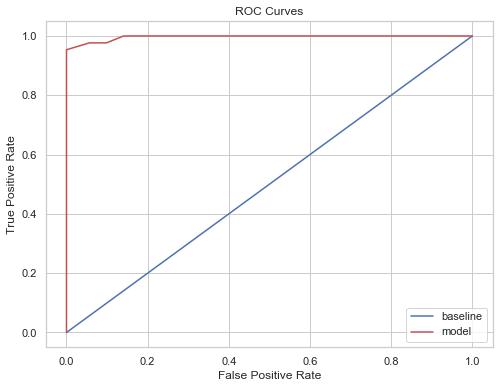

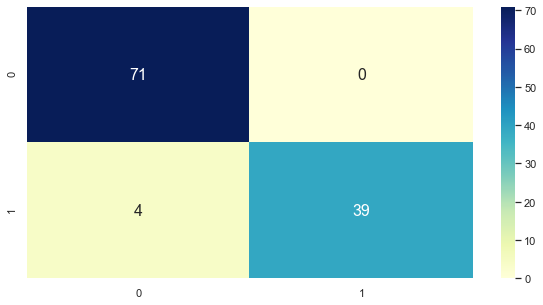

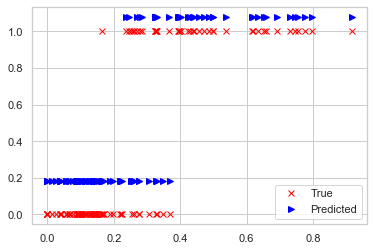

In [47]:
print('Minimum Accuracy:', min(acc_knn))
minacc = ((acc_knn.index(min(acc_knn))) * 5) + 5
knn_pred, knn_probs, knn_acc, knn_cm, knn_cr, knn_rms, knn_f, knn_cv5, knn_cv10, knn_cv15, knn_cv20, knn_rmscv5, knn_score=knnmodel(minacc)
evaluate_model(knn_pred, knn_probs, knn_cm)

##### Maximum Accuracy

Maximum Accuracy: 0.9824561403508771


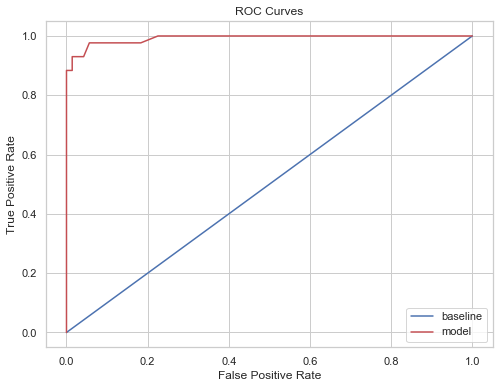

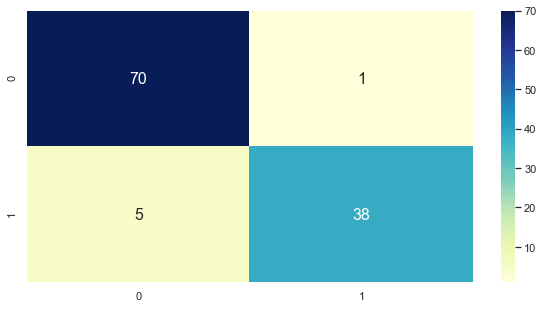

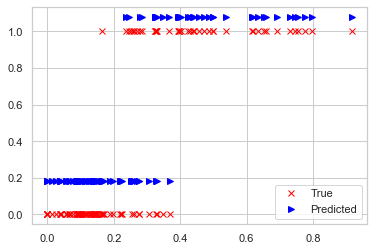

In [51]:
print('Maximum Accuracy:', max(acc_knn))
maxacc = ((acc_knn.index(max(acc_knn))) * 5) + 5
knn_pred, knn_probs, knn_acc, knn_cm, knn_cr, knn_rms, knn_f, knn_cv5, knn_cv10, knn_cv15, knn_cv20, knn_rmscv5, knn_score=knnmodel(maxacc)
evaluate_model(knn_pred, knn_probs, knn_cm)